### Designing Non-Linear Support Vector Machine
***Author: Pratyush Bagaria (pbagar2@uic.edu)***

In [1]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

In [2]:
n = 100
x = np.random.uniform(0,1,(n, 2))
cPlus, cMinus = [],[]
d = np.array([1.]*n, dtype=float)
for i in range(n):
    if x[i][1]<(0.2*np.sin(10*x[i][0]))+0.3 or (x[i][1]-0.8)**2+(x[i][0]-0.5)**2<0.15**2:
        cPlus.append(x[i])
    else:
        d[i] = -1.
        cMinus.append(x[i])

In [4]:
def polynomial(x,y):
    return (np.dot(x,y)+1) ** 4

In [5]:
kernelMatrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        kernelMatrix[i,j] = polynomial(x[i],x[j])

In [6]:
'''
References:
https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf
https://cvxopt.org/userguide/coneprog.html#quadratic-programming
'''

P = cvxopt.matrix(np.outer(d,d) * kernelMatrix)
q = cvxopt.matrix(np.array([-1.]*100, dtype=float))
G = cvxopt.matrix(np.diag(np.array([-1.]*100, dtype=float)))
h = cvxopt.matrix(np.zeros(n))
A = cvxopt.matrix(d, (1,n))
b = cvxopt.matrix(0.0)

In [7]:
solution = cvxopt.solvers.qp(P, q, G, h, A, b)
alphaArray = np.ravel(solution['x'])

     pcost       dcost       gap    pres   dres
 0: -5.7151e+01 -1.5038e+02  3e+02  1e+01  3e+00
 1: -2.2377e+02 -3.4986e+02  2e+02  7e+00  1e+00
 2: -4.9763e+02 -6.8467e+02  2e+02  7e+00  1e+00
 3: -1.3420e+03 -1.6496e+03  3e+02  6e+00  1e+00
 4: -4.6124e+03 -5.2403e+03  7e+02  6e+00  1e+00
 5: -1.8454e+04 -2.0390e+04  2e+03  5e+00  1e+00
 6: -2.7029e+04 -2.9674e+04  3e+03  5e+00  1e+00
 7: -6.7147e+04 -7.3408e+04  6e+03  5e+00  1e+00
 8: -1.6291e+05 -1.8081e+05  2e+04  5e+00  1e+00
 9: -2.7651e+05 -3.1596e+05  4e+04  5e+00  1e+00
10: -5.1145e+05 -6.1645e+05  1e+05  4e+00  8e-01
11: -7.9149e+05 -9.6295e+05  2e+05  2e+00  5e-01
12: -8.8839e+05 -9.4140e+05  5e+04  4e-01  8e-02
13: -8.9109e+05 -8.9187e+05  8e+02  5e-03  1e-03
14: -8.9111e+05 -8.9111e+05  8e+00  5e-05  1e-05
15: -8.9111e+05 -8.9111e+05  8e-02  5e-07  1e-07
16: -8.9111e+05 -8.9111e+05  8e-04  5e-09  2e-09
Optimal solution found.


In [8]:
supportVectors_x = []
supportVectors_d = []
for i in range(n):
    if (alphaArray[i] > 0.00001):
        supportVectors_x.append(x[i])
        supportVectors_d.append(d[i])

In [9]:
theta = supportVectors_d[1]
for i in range(n):
    theta -= alphaArray[i]*d[i]*polynomial(x[i], supportVectors_x[1])
print (theta)

95.69523036885926


In [10]:
X = np.linspace(0, 1, num=1000)
Y = np.linspace(0, 1, num=1000)
H, Hminus, Hplus = [],[],[]

for i in range(len(X)):
    for j in range(len(Y)):
        descriminant = theta
        for k in range(n):
            descriminant+=alphaArray[k]*d[k]*polynomial(x[k],np.asarray([X[i],Y[j]]))
        if -0.1 < descriminant < 0.1:
            H.append([X[i], Y[j]])
        elif -1.1 < descriminant < -0.9:
            Hminus.append([X[i], Y[j]])
        elif 0.9 < descriminant < 1.1:
            Hplus.append([X[i], Y[j]])

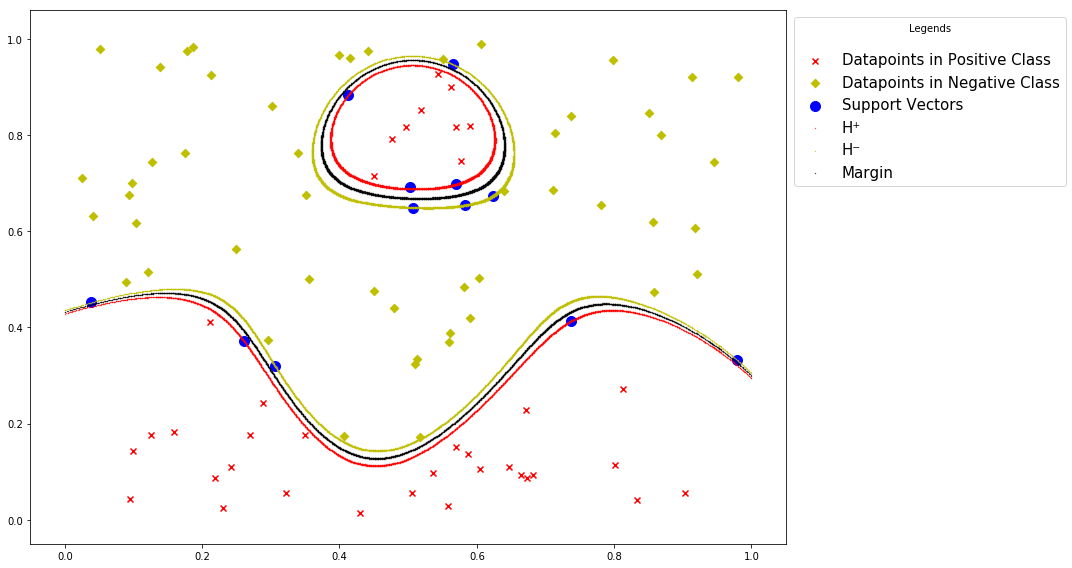

In [30]:
plt.scatter(*zip(*cPlus), c='r', marker='x', label='Datapoints in Positive Class')
plt.scatter(*zip(*cMinus), c='y', marker='D', label='Datapoints in Negative Class')
plt.scatter(*zip(*supportVectors_x), c='b', s=100, marker='o', label='Support Vectors')
plt.scatter(*zip(*Hplus), c='r', s=0.1, label='H\u207A')
plt.scatter(*zip(*Hminus), c='y', s=0.1, label='H\u207B')
plt.scatter(*zip(*H), c='black', s=0.1, label='Margin')
plt.legend(bbox_to_anchor=(1,1), loc='best', title="Legends\n", prop={'size':15})
plt.tight_layout(rect=[0, 0, 2.5, 2])
plt.show()